# Welcome to Lab_Plots! 🕵🏻‍♂️ 📊 🕵🏻‍♀️

Fun fact: Every employee at the University of Illinois is a "public employee" and all public employee salaries are [publicly available online](https://www.bot.uillinois.edu/resources/gray_book) -- we have curated this data in a cleaned dataset for you to explore!  This includes data about every professor, administrator, and football coach!

The goal of this lab is to work with **real UIUC salary data** to explore its properties, answer important questions, and to think about the implications of collecting and analyzing this data.  Throughout the lab, it is important to think about being a critical consumer of data who can not only use statistics and programming to analyze data, but can also think about the **"why"** part of data science both in the classroom and in the world. Let’s get started!

In this lab, you will:
- Work with real UIUC salary data to explore some of the statistics that we talked about in lecture: mean, median, standard deviation, etc.
- Practice creating plots to **visualize quantitative data**: boxplots and histograms.
- See how data science can be used in the real world to think about important issues through written individual reflections and discussions with your group.

A few tips to remember:

- **You are not alone on your journey in learning programming!**  You have your lab TA, the CAs, your lab group, and the professors (Prof. Wade and Prof. Karle), who are all here to help you out!
- If you find yourself stuck for more than a few minutes, ask a neighbor or course staff for help!  When you are giving help to your neighbor, explain the **idea and approach** to the problem without sharing the answer itself so they can have the same **<i>ah-hah</i>** moment!
- We are here to help you!  Don't feel embarrassed or shy to ask us for help!

Let's get started!


<hr style="color: #DD3403;">

In [ ]:
# Meet your CAs and TA if you haven't already!
# First name is enough, we'll know who they are! :)
ta_name = "Jake"
ca1_name = "Jessica"
ca2_name = "Mia"
ca3_name = ""

# Work with your group again this week! 
#
# QOTD to Ask Your Group: "What's your go-to coffee/tea/boba order?"
partner1_name = "Haibo Che"
partner1_netid = "haiboc2"
partner1_order = "coffee"

partner2_name = "Siyu Wu"
partner2_netid = "siyuw6"
partner2_order = "boba"

partner3_name = ""
partner3_netid = ""
partner3_order = ""

<hr style="color: #DD3403;">

## Setup: Import the Graybook Dataset

The "Gray Book" is historical term for the book of "Academic and Administrative Appointments".  As a public university, all positions (including job title, tenure status, and salary) at UIUC are publicly approved by the Board of Trustees.  After approval, they are published publicly at [https://www.bot.uillinois.edu/resources/gray_book](https://www.bot.uillinois.edu/resources/gray_book).

We have parsed the HTML tables and done a little data cleaning for you. The "Graybook Dataset" provided here includes all faculty (except for the Division of Collegiate Athletics, for salary outlier reasons) at the University of Illinois, based on the **2023-2024 Graybook report**.  A CSV version of this dataset is available at the following URL:

```
https://waf.cs.illinois.edu/discovery/graybook.csv
```

Import `pandas` and load this dataset into a DataFrame, `df`:

In [3]:
import pandas as pd
df= pd.read_csv("https://waf.cs.illinois.edu/discovery/graybook.csv")

### 🔬 Test Case Checkpoint 🔬

In [4]:
## == TEST CASES for Loading in Graybook ==
# - This read-only cell contains test cases for your previous cell.
# - If this cell runs with a message (with the emoji showing), you PASSED all test cases!
# - If this cell results in any errors, check your previous cell, make changes, and RE-RUN your code and then this cell.
assert( 'df' in vars()), "Load the dataset into the variable named `df`."
assert ( len(df) == 6288 ), "This is not the Graybook dataset you're looking for."

## == SUCCESS MESSAGE ==
# You will only see this message (with the emoji showing) if you passed all test cases:
tada = "\N{PARTY POPPER}"
print(f"{tada} All tests passed! {tada}")   

🎉 All tests passed! 🎉


<hr style="color: #DD3403;">

## Part 1: Exploratory Data Analysis (EDA)

As discussed in lecture, the first step of any data analysis is to **get familiar** with your dataset.  Think about what this data can tell you and what variables are included.  Data scientists always start with this step.

Let’s do some general **exploratory data analysis** to feel out our dataset.  Before you do any calculations, ponder this question:

**Q: What do you estimate the average salary of all UIUC Faculty to be?**

*($50000/month)*

### Puzzle 1.1: Descriptive Statistics

Our Graybook Dataset contains both the `Present Salary` and `Proposed Salary` of employees at U of I. For now, we're only interested in the present salary.

Using `df`, find the following information:

1. The number of faculty at UIUC, stored in the variable `num_employee` (Hint: each row is an employee!)
2. The **mean** present salary, storing in the variable `mean_sal`
3. The **median** present salary, storing in the variable `median_sal`
4. The **standard deviation** of present salary, storing in the variable `std_sal`

Remember, present salary is found in the `"Present Salary"` column! 

In [5]:
# Find the number of employees at UIUC:
num_employee = len(df)
num_employee

6288

In [6]:
# Find the average (mean) salary at UIUC:
mean_sal = df["Present Salary"].mean()
mean_sal

np.float64(104221.36810591603)

In [7]:
# Find the median salary at UIUC:
median_sal = df["Present Salary"].median()
median_sal

np.float64(87975.0)

In [8]:
# Find the standard deviation of the salary at UIUC:
std_sal = df["Present Salary"].std()
std_sal

np.float64(111699.42003675704)

### 🔬 Test Case Checkpoint 🔬

In [9]:
## == TEST CASES for Puzzle 1.1 ==
# - This read-only cell contains test cases for your previous cell.
# - If this cell runs with a message (with the emoji showing), you PASSED all test cases!
# - If this cell results in any errors, check your previous cell, make changes, and RE-RUN your code and then this cell.
import math

x = mean_sal + median_sal + std_sal
assert( num_employee == 6288 ), "Your calculations of the number of employees is incorrect."
assert( math.isclose(x, 303895.7881426731) ), "Your calculations of the number of employees is incorrect."

## == SUCCESS MESSAGE ==
# You will only see this message (with the emoji showing) if you passed all test cases:
tada = "\N{PARTY POPPER}"
print(f"{tada} All tests passed! {tada}")

🎉 All tests passed! 🎉


### Visual Displays of Data: A Key Part of EDA!

Now, we are a bit more familiar with the dataset through summary statistics. Looking at overall descriptive statistics helps us summarize all of the observations in a column, rather than having to scroll through all of the observations!  However, descriptive statistics alone often don’t tell the whole story. This is where having tools for **visualizing statistics** comes in handy.

### Puzzle 1.2: Boxplots

Next, let’s look at a simple, yet powerful visualization: the **boxplot**! 

Generate a **boxplot** of the `Present Salary` column by using:

> ```py
> df["Present Salary"].plot.box()
> ```

We can make the boxplot to be drawn horizontally by using `vert=False` option in the `box` function:

> ```py
> df["Present Salary"].plot.box(vert=False)
> ```


Even better, inside of the `box` function options, include `figsize=(8, 5)` to control the size of the figure:

> ```py
> df['Present Salary'].plot.box(vert=False, figsize=(8, 5))
> ```


<Axes: >

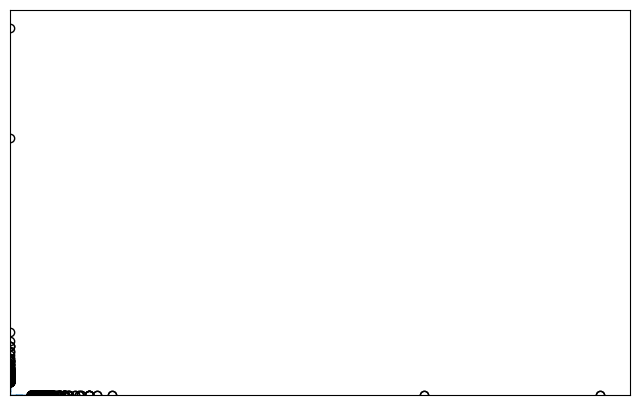

In [13]:
df["Present Salary"].plot.box()
df["Present Salary"].plot.box(vert=False)
df['Present Salary'].plot.box(vert=False, figsize=(8, 5))

### Analysis

**Question**: This visualization is different than any boxplot you saw in lecture!  **With your group**, discuss (1): why the box is almost unreadable and (2): explain your prediction of what the extreme outliers might be in this dataset.

*(due to extreme outliers in the "Present Salary" data, which compress the box representing the interquartile range, making it appear very small. )*

###  Puzzle 1.3: The $500,000 Club

Create a new DataFrame, `df_over_500k`, that includes all employees whose `Present Salary` is greater than or equal to $500,000.

In [14]:
df_over_500k = df[df['Present Salary'] >= 500000]
df_over_500k

,Employee Name,Primary Job Title,Department Name,College Code,College Name,Present FTE,Proposed FTE,Present Salary,Proposed Salary,Tenure,Empl Class,Secondary Job Titles,Secondary Department Names
470,"Jones, Robert J",CHANC UC & V PRES UI,Office of the Chancellor,NaN,Chancellor,1.0,1.0,799000.0,838950.00,NaN,BA,['PROF'],['Crop Sciences']
1099,"Cohen, Mark Steven",DEAN,Carle IL COM Administration,LT,Carle Illinois Medicine,1.0,1.0,725000.0,757625.00,NaN,BA,"['PROF', 'SVP & CHIEF ACADEMIC OFFICER', 'PROF...","['Bioengineering', 'Beckman Institute', 'Insti..."
1514,"Anderson, Timothy Oronde","ASST VAR COACH, MENS BSKTBAL",Intercollegiate Athletics,NU,Div Intercollegiate Athletics,1.0,1.0,551250.0,551250.00,NaN,BA,NaN,NaN
1522,"Bielema, Bret Arnold",HEAD VARSITY COACH FOOTBALL,Intercollegiate Athletics,NU,Div Intercollegiate Athletics,1.0,1.0,6008000.0,6008000.00,NaN,BA,['HEAD VAR COACH FTBALL (AUTO)'],NaN
1530,"Buh, Andrew Toku","ASST VARSITY COACH, FTBAL",Intercollegiate Athletics,NU,Div Intercollegiate Athletics,1.0,1.0,506000.0,506000.00,NaN,BA,"['ASST VAR COACH, FTBAL (AUTO)']",NaN
1531,"Bullen, Charles","ASST VARSITY COACH, FTBAL",Intercollegiate Athletics,NU,Div Intercollegiate Athletics,1.0,1.0,556000.0,556000.00,NaN,BA,"['ASST COACH, FTBAL (AUTO)']",NaN
1563,"Frazier, Chester Lee","ASST VAR COACH, MENS BSKTBAL",Intercollegiate Athletics,NU,Div Intercollegiate Athletics,1.0,1.0,551250.0,551250.00,NaN,BA,NaN,NaN
1574,"Green, Shauna Lee","HEAD VRST COACH, WBB",Intercollegiate Athletics,NU,Div Intercollegiate Athletics,1.0,1.0,808000.0,808000.00,NaN,BA,"['HEAD VRST, WBB (AUTO)']",NaN
1584,"Henry, Aaron Rashad","ASST VARSITY COACH, FTBAL",Intercollegiate Athletics,NU,Div Intercollegiate Athletics,1.0,1.0,700000.0,700000.00,NaN,BA,NaN,NaN
1594,"Jamison, Terrance Taron","ASST VARSITY COACH, FTBAL",Intercollegiate Athletics,NU,Div Intercollegiate Athletics,1.0,1.0,557200.0,557200.00,NaN,BA,"['ASST COACH, FTBAL (AUTO)']",NaN


Create a second DataFrame, `df_under_500k`, that includes all employees whose `Present Salary` is less than $500,000.

In [15]:
df_under_500k = df[df['Present Salary'] < 500000]
df_under_500k

,Employee Name,Primary Job Title,Department Name,College Code,College Name,Present FTE,Proposed FTE,Present Salary,Proposed Salary,Tenure,Empl Class,Secondary Job Titles,Secondary Department Names
0,"Gerstenecker, David G",DIR OF INFO TECHNOL,ACES Technology Services,KL,"Agr, Consumer & Env Sciences",1.0,1.0,109670.28,112412.04,NaN,BA,NaN,NaN
1,"Henry, Joshua Keith",ASSOC DIR INFO TECHNOL,ACES Technology Services,KL,"Agr, Consumer & Env Sciences",1.0,1.0,83701.83,88723.94,NaN,BA,NaN,NaN
2,"Meyer, Donald L",SR NETWORK ANLYS,ACES Technology Services,KL,"Agr, Consumer & Env Sciences",1.0,1.0,92692.76,96400.47,NaN,BA,NaN,NaN
3,"Winter-Nelson, Alex E",PROF,Agr & Consumer Economics,KL,"Agr, Consumer & Env Sciences",1.0,1.0,193532.64,204244.60,A,AA,"['DIR, ADMI', 'ASSOC DEAN FOR INATL PRGMS']","['ADM Institute for PHL', 'Agr, Consumer & Env..."
4,"Axtman-Barker, Pamela Ann",INSTR,Ag Ldrshp Educ Comm Program,KL,"Agr, Consumer & Env Sciences",1.0,1.0,75000.00,75000.00,NaN,AL,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6283,"Chambers, Sonya L",EXEC DIR STRATG INITIATIVES,Vice Chancellor for Diversity,NV,Vice Chancellor for Diversity,1.0,1.0,169500.00,176280.00,NaN,BA,NaN,NaN
6284,"Garrick, Sean C","VC FOR DVSTY, EQUITY & INCL",Vice Chancellor for Diversity,NV,Vice Chancellor for Diversity,1.0,1.0,351778.94,364091.20,NaN,BA,NaN,NaN
6285,"Guerra Perez, Gioconda",EXEC ASSOC VC FOR DVSTY,Vice Chancellor for Diversity,NV,Vice Chancellor for Diversity,1.0,1.0,187250.00,195676.25,NaN,BA,NaN,NaN
6286,"VanDuyne, Adam Jareb",EXEC DIR FIN & ADMN,Vice Chancellor for Diversity,NV,Vice Chancellor for Diversity,1.0,1.0,147200.00,153824.00,NaN,BA,NaN,NaN


### Part 1.4: Boxplots (Round 2)

Create a boxplot of all employees whose `Present Salary` is less than $500,000:

<Axes: >

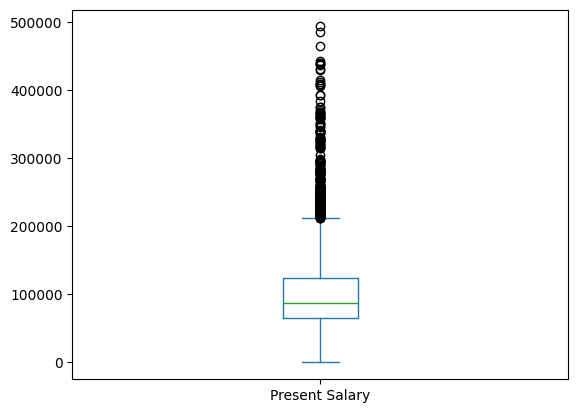

In [22]:
df_under_500k["Present Salary"].plot.box()

### Part 1.5: Histograms

Create a histogram of all employees whose `Present Salary` is less than $500,000:

<Axes: ylabel='Frequency'>

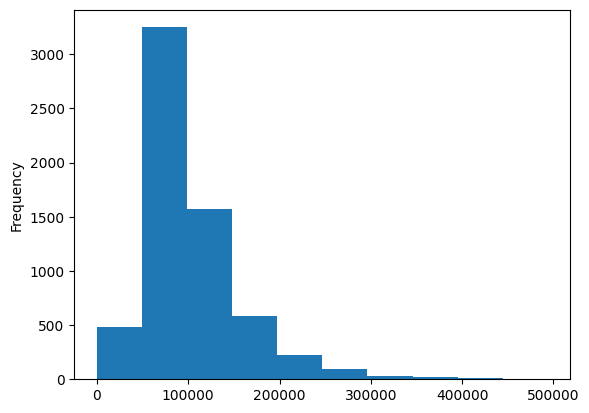

In [23]:
df_under_500k["Present Salary"].plot.hist()

**Analysis: Using the data visualizations above, estimate what the lowest salary is that is a HIGH outlier in the under 500k group's boxplot.  Write your answer in the cell below as a complete sentence.**

*(around 200000)*

### 🔬 Test Case Checkpoint 🔬

In [24]:
## == TEST CASES for Puzzle 1 ==
# - This read-only cell contains test cases for your previous cell.
# - If this cell runs with a message (with the emoji showing), you PASSED all test cases!
# - If this cell results in any errors, check your previous cell, make changes, and RE-RUN your code and then this cell.
assert( len(df_under_500k) == 6268 ), "Your `df_under_500k` has the incorrect number of rows."
assert( df_over_500k["Present Salary"].min() >= 500000 ), "Your conditional for `df_over_500k` is incorrect."
assert( df_under_500k["Present Salary"].max() < 500000 ), "Your conditional for `df_under_500k` is incorrect."

## == SUCCESS MESSAGE ==
# You will only see this message (with the emoji showing) if you passed all test cases:
tada = "\N{PARTY POPPER}"
print(f"{tada} All tests passed! {tada}")

🎉 All tests passed! 🎉


<hr style="color: #DD3403;">

## Part 2: Gender and Salaries

Data can reveal **systemic problems or discrimination**. For example, in many companies, men and women are promoted at **different rates**.  Let’s look at a subset of the salary dataset to investigate whether or not there is a **difference in salaries** between faculty who identify as men and women in two departments: **STAT** and **CS** (Karle and Wade’s home departments). 

We've compiled data from these departments, added a `Gender` column, and placed it in a dataset called `STAT_CS_gender.csv`. 

This data is also located in the **same directory as this lab**. To load it in, just specify the **local file path** (`"STAT_CS_gender.csv"`)!

### Puzzle 2.1: Loading A Second Dataset
Using the cell below, import `STAT_CS_gender.csv`, store it in a variable called `STAT_CS_df`, and display it to see what it looks like!

In [25]:
STAT_CS_df = pd.read_csv("STAT_CS_gender.csv")
STAT_CS_df

,Employee Name,Gender,Primary Job Title,Department Name,College Code,College Name,Present FTE,Proposed FTE,Present Salary,Proposed Salary,Tenure,Empl Class,Secondary Job Titles,Secondary Department Names
0,"Abdelzaher, Tarek",M,PROF,Computer Science,KP,Grainger Engineering,1.0,1.0,220000.00,228800.00,A,AA,"['PROF, CSL', 'PROF, ITI']","['Coordinated Science Lab', 'Information Trust..."
1,"Adve, Sarita V",F,PROF,Computer Science,KP,Grainger Engineering,1.0,1.0,230000.00,240000.00,A,AA,"['PROF, CSL', 'PROF, ITI']","['Coordinated Science Lab', 'Electrical & Comp..."
2,"Adve, Vikram Sadanand",M,PROF,Computer Science,KP,Grainger Engineering,1.0,1.0,230000.00,240000.00,A,AA,"['PROF, CSL', 'PROF, ITI', 'PROF, NCSA']","['Coordinated Science Lab', 'Information Trust..."
3,"Alagappan, Ramnatthan",M,ASST PROF,Computer Science,KP,Grainger Engineering,1.0,1.0,135000.00,140400.00,P,AA,NaN,NaN
4,"Alawini, Abdussalam Alhadi M",M,TCH ASSOC PROF,Computer Science,KP,Grainger Engineering,1.0,1.0,138000.00,153600.00,M,AA,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,"Zhang, Lingming",M,ASSOC PROF,Computer Science,KP,Grainger Engineering,1.0,1.0,155000.00,163200.00,A,AA,NaN,NaN
141,"Zhao, Han",M,ASST PROF,Computer Science,KP,Grainger Engineering,1.0,1.0,136000.00,141440.00,P,AA,NaN,['Electrical & Computer Eng']
142,"Zhao, Sihai Dave",M,ASSOC PROF,Statistics,KV,Liberal Arts & Sciences,1.0,1.0,135475.46,141247.33,A,AA,"['ASSOC PROF, CI MED', 'AFFILIATE, IGB', 'ASST...","['Biomed & Translational Sci', 'Bioengineering..."
143,"Zhu, Ruoqing",M,ASSOC PROF,Statistics,KV,Liberal Arts & Sciences,1.0,1.0,117159.38,125845.76,A,AA,"['ASSOC PROF, CI MED', 'AFFILIATE, IGB', 'ASSO...","['Biomed & Translational Sci', 'Institute for ..."


Now, let's create **two subsets** of our `STAT_CS_df`. 

Using conditionals in the cells below, create:
- `STAT_CS_M`, a `DataFrame` of the staff and faculty who identify as Male (**"M"**) under the `Gender` column 
- `STAT_CS_F`, a `DataFrame` of the staff and faculty who identify as Female (**"F"**) under the `Gender` column 

In [26]:
STAT_CS_M =  STAT_CS_df[STAT_CS_df['Gender'] == 'M']
STAT_CS_M

,Employee Name,Gender,Primary Job Title,Department Name,College Code,College Name,Present FTE,Proposed FTE,Present Salary,Proposed Salary,Tenure,Empl Class,Secondary Job Titles,Secondary Department Names
0,"Abdelzaher, Tarek",M,PROF,Computer Science,KP,Grainger Engineering,1.0,1.0,220000.00,228800.00,A,AA,"['PROF, CSL', 'PROF, ITI']","['Coordinated Science Lab', 'Information Trust..."
2,"Adve, Vikram Sadanand",M,PROF,Computer Science,KP,Grainger Engineering,1.0,1.0,230000.00,240000.00,A,AA,"['PROF, CSL', 'PROF, ITI', 'PROF, NCSA']","['Coordinated Science Lab', 'Information Trust..."
3,"Alagappan, Ramnatthan",M,ASST PROF,Computer Science,KP,Grainger Engineering,1.0,1.0,135000.00,140400.00,P,AA,NaN,NaN
4,"Alawini, Abdussalam Alhadi M",M,TCH ASSOC PROF,Computer Science,KP,Grainger Engineering,1.0,1.0,138000.00,153600.00,M,AA,NaN,NaN
6,"Angrave, Lawrence Christopher",M,TCH PROF,Computer Science,KP,Grainger Engineering,1.0,1.0,160000.00,171000.00,M,AA,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,"Zhang, Lingming",M,ASSOC PROF,Computer Science,KP,Grainger Engineering,1.0,1.0,155000.00,163200.00,A,AA,NaN,NaN
141,"Zhao, Han",M,ASST PROF,Computer Science,KP,Grainger Engineering,1.0,1.0,136000.00,141440.00,P,AA,NaN,['Electrical & Computer Eng']
142,"Zhao, Sihai Dave",M,ASSOC PROF,Statistics,KV,Liberal Arts & Sciences,1.0,1.0,135475.46,141247.33,A,AA,"['ASSOC PROF, CI MED', 'AFFILIATE, IGB', 'ASST...","['Biomed & Translational Sci', 'Bioengineering..."
143,"Zhu, Ruoqing",M,ASSOC PROF,Statistics,KV,Liberal Arts & Sciences,1.0,1.0,117159.38,125845.76,A,AA,"['ASSOC PROF, CI MED', 'AFFILIATE, IGB', 'ASSO...","['Biomed & Translational Sci', 'Institute for ..."


In [27]:
STAT_CS_F =  STAT_CS_df[STAT_CS_df['Gender'] == 'F']
STAT_CS_F

,Employee Name,Gender,Primary Job Title,Department Name,College Code,College Name,Present FTE,Proposed FTE,Present Salary,Proposed Salary,Tenure,Empl Class,Secondary Job Titles,Secondary Department Names
1,"Adve, Sarita V",F,PROF,Computer Science,KP,Grainger Engineering,1.0,1.0,230000.00,240000.00,A,AA,"['PROF, CSL', 'PROF, ITI']","['Coordinated Science Lab', 'Electrical & Comp..."
5,"Amato, Nancy Marie",F,PROF,Computer Science,KP,Grainger Engineering,1.0,1.0,293100.00,309775.00,A,AA,"['HEAD', 'PROF, CSL', 'PROF, HCESC', 'AFFILIAT...","['Coordinated Science Lab', 'Institute for Gen..."
10,"Bravo De Guenni, Lelys",F,CLIN ASSOC PROF,Statistics,KV,Liberal Arts & Sciences,1.0,1.0,100000.00,105000.00,NaN,AA,NaN,['Latin American & Carib Studies']
19,"Chronopoulou, Alexandra",F,CLIN ASSOC PROF,Statistics,KV,Liberal Arts & Sciences,1.0,1.0,105570.00,109792.80,NaN,AA,['CSBS AFFILIATE'],"['Coordinated Science Lab', 'Interdis Health S..."
21,"Cobb, Camille Morgan",F,ASST PROF,Computer Science,KP,Grainger Engineering,1.0,1.0,136000.00,141440.00,P,AA,NaN,NaN
24,"Cunningham, Kathryn Irene",F,ASST PROF,Computer Science,KP,Grainger Engineering,1.0,1.0,135000.00,140400.00,P,AA,NaN,NaN
27,"Dayanikli, Gokce",F,ASST PROF,Statistics,KV,Liberal Arts & Sciences,1.0,1.0,118000.00,118000.00,P,AA,NaN,NaN
28,"Deeke, Julie M",F,TCH ASST PROF,Statistics,KV,Liberal Arts & Sciences,1.0,1.0,90045.00,93646.80,NaN,AA,NaN,NaN
34,"Ellison, Victoria Marie",F,TCH ASST PROF,Statistics,KV,Liberal Arts & Sciences,1.0,1.0,90134.50,93739.88,NaN,AA,NaN,NaN
41,"Flanagan, Karle Ann",F,TCH ASSOC PROF,Statistics,KV,Liberal Arts & Sciences,1.0,1.0,104000.00,115760.00,NaN,AA,['DIR INCLSV DATA SCI ED'],['LAS Administration']


### 🔬 Test Case Checkpoint 🔬

In [28]:
## == TEST CASES for Puzzle 2.1 ==
# - This read-only cell contains test cases for your previous cell.
# - If this cell runs without any errors, you PASSED all test cases!
# - If this cell results in any errors, check your previous cell, make changes, and RE-RUN your code and then this cell.
assert("STAT_CS_df" in vars()), "Ensure you've named your original DataFrame `STAT_CS_df`."
assert(len(STAT_CS_df) == 145), "This is not the STAT_CS_df you are looking for."
assert("STAT_CS_M" in vars()), "Ensure your male subset of STAT_CS_df is named `STAT_CS_M`."
assert(len(STAT_CS_M) == 106), "Double check your conditional to generate STAT_CS_M - the number of rows is incorrect."
assert("STAT_CS_F" in vars()), "Ensure your female subset of STAT_CS_df is named `STAT_CS_F`."
assert(len(STAT_CS_F) == 39), "Double check your conditional to generate STAT_CS_F - the number of rows is incorrect."

## == SUCCESS MESSAGE ==
# You will only see this message (with the emoji showing) if you passed all test cases:
tada = "\N{PARTY POPPER}"
print(f"{tada} All tests passed! {tada}")

🎉 All tests passed! 🎉


### Puzzle 2.2: Merging Two Columns into One DataFrame

To create a new DataFrame containing only the data you found above, the following provided line of code creates `df_salary_by_gender`:

In [29]:
df_salary_by_gender = pd.DataFrame({
    "female": STAT_CS_F["Present Salary"],
    "male": STAT_CS_M["Present Salary"],
})

Take a look at the DataFrame `df_salary_by_gender`.  Every row will either have data in the `female` column or the `male` column, meaning every row represents a male or female employee's `Present Salary`:

In [30]:
df_salary_by_gender

,female,male
0,NaN,220000.00
1,230000.0,NaN
2,NaN,230000.00
3,NaN,135000.00
4,NaN,138000.00
...,...,...
140,NaN,155000.00
141,NaN,136000.00
142,NaN,135475.46
143,NaN,117159.38


### Puzzle 2.3: Visualization

Let's create a visualization! Using the next cell, create a **boxplot** of `df_salary_by_gender` that includes both genders:

<Axes: >

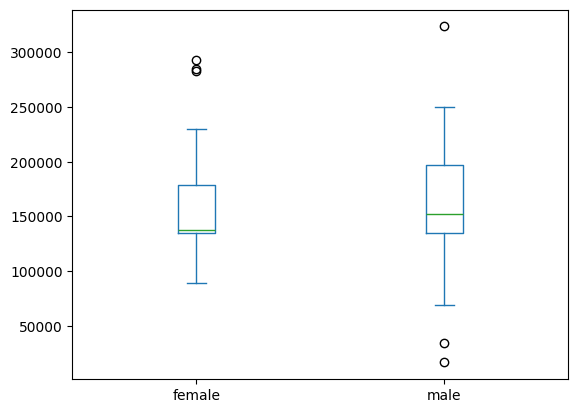

In [34]:

df_salary_by_gender.plot.box()



### Puzzle 2.4: EDA

Now that we've visualized the data, let's explore some basic statistics once more to gain further insight. 

In the following cells, calculate:
- The **mean** `Present Salary` for **Male** STAT/CS Faculty, storing in the variable `mean_m`
- The **median** `Present Salary` for **Male** STAT/CS Faculty, storing in the variable `median_m`
- The **standard deviation** of `Present Salary` for **Male** STAT/CS Faculty, storing in the variable `std_m`

In [35]:
mean_m =  STAT_CS_M['Present Salary'].mean()
mean_m

np.float64(157679.5082075472)

In [37]:
median_m =STAT_CS_M['Present Salary'].median()
median_m

np.float64(152500.0)

In [44]:
std_m =  STAT_CS_M['Present Salary'].std()
std_m

np.float64(49368.32738020144)

Now, in the cells below, calculate:

- The **mean** `Present Salary` for **Female** STAT/CS Faculty, storing in the variable `mean_f`
- The **median** `Present Salary` for **Female** STAT/CS Faculty, storing in the variable `median_f` 
- The **standard deviation** of `Present Salary` for **Female** STAT/CS Faculty, storing in the variable `std_f`

In [39]:
mean_f =  STAT_CS_F['Present Salary'].mean()
mean_f

np.float64(157847.47794871795)

In [40]:
median_f =  STAT_CS_F['Present Salary'].median()
median_f

np.float64(138000.0)

In [47]:
std_f =  STAT_CS_F['Present Salary'].std()
std_f

np.float64(50583.79948660857)

Run the following cell to make a summary table of your previously calculated data:

In [42]:
pd.DataFrame([
  {"Gender": "F", "Mean ($)": round(mean_f), "Median ($)": round(median_f), "Standard Deviation ($)": round(std_f)},
  {"Gender": "M", "Mean ($)": round(mean_m), "Median ($)": round(median_m), "Standard Deviation ($)": round(std_m)},
])

,Gender,Mean ($),Median ($),Standard Deviation ($)
0,F,157847,138000,49368
1,M,157680,152500,49368


### 🔬 Test Case Checkpoint 🔬

In [48]:
## == TEST CASES for Puzzle 2.4 ==
# - This read-only cell contains test cases for your previous cell.
# - If this cell runs with a message (with the emoji showing), you PASSED all test cases!
# - If this cell results in any errors, check your previous cell, make changes, and RE-RUN your code and then this cell.
import math
assert( math.isclose( mean_f, 157847.477949 ) ), "Your female STAT/CS faculty mean present salary is incorrect."
assert( math.isclose( median_f, 138000.0 ) ), "Your female STAT/CS faculty median present salary is incorrect."
assert( math.isclose( std_f, 50583.799487 ) ), "Your female STAT/CS faculty present salary standard deviation is incorrect."
assert( math.isclose( mean_m, 157679.508208 ) ), "Your male STAT/CS faculty mean present salary is incorrect."
assert( math.isclose( median_m, 152500.0 ) ), "Your male STAT/CS faculty median present salary is incorrect."
assert( math.isclose( std_m, 49368.327380 ) ), "Your male STAT/CS faculty present salary standard deviation is incorrect."

## == SUCCESS MESSAGE ==
# You will only see this message (with the emoji showing) if you passed all test cases:
tada = "\N{PARTY POPPER}"
print(f"{tada} All tests passed! {tada}")

🎉 All tests passed! 🎉


### Analysis: EDA Takeaways

**Q: Now that you've calculated descriptive statistics of the `Present Salary` of Male and Female STAT/CS Faculty, how do the numbers support or counter the boxplot observations you made earlier? Can we draw any conclusions about gender-based salary discrimination from our data? Use the analysis you did to support your answer.**

*( while there’s no significant difference in average salaries, the potential for salary discrimination might still exist, particularly if certain high-paying positions are disproportionately held by males)*

<hr style="color: #DD3403;">

## Part 3: Exploring Your Own Interests


At this point of the lab, we have investigated a lot of questions.

However, these have been questions that **we told you to answer**. As a data scientist, it is important to be able to use the data science skills that you learn in the classroom to answer questions that **you have**.

Think about **two questions** that you have about the **Graybook** or **STAT_CS_Gender** datasets that have not been answered. These can be simple questions. Record them below.  Then, answer at least one of these questions using Python and either dataset.  

*( all employees whose `Proposed Salary` is greater than or equal to $500,000.)*


Now, use the cell below to **find the answer** to (at least) **one** of your questions! Remember, it can be something simple. 

In [53]:
df_under_500k = df[df['Proposed Salary'] < 500000]
df_under_500k

,Employee Name,Primary Job Title,Department Name,College Code,College Name,Present FTE,Proposed FTE,Present Salary,Proposed Salary,Tenure,Empl Class,Secondary Job Titles,Secondary Department Names
0,"Gerstenecker, David G",DIR OF INFO TECHNOL,ACES Technology Services,KL,"Agr, Consumer & Env Sciences",1.0,1.0,109670.28,112412.04,NaN,BA,NaN,NaN
1,"Henry, Joshua Keith",ASSOC DIR INFO TECHNOL,ACES Technology Services,KL,"Agr, Consumer & Env Sciences",1.0,1.0,83701.83,88723.94,NaN,BA,NaN,NaN
2,"Meyer, Donald L",SR NETWORK ANLYS,ACES Technology Services,KL,"Agr, Consumer & Env Sciences",1.0,1.0,92692.76,96400.47,NaN,BA,NaN,NaN
3,"Winter-Nelson, Alex E",PROF,Agr & Consumer Economics,KL,"Agr, Consumer & Env Sciences",1.0,1.0,193532.64,204244.60,A,AA,"['DIR, ADMI', 'ASSOC DEAN FOR INATL PRGMS']","['ADM Institute for PHL', 'Agr, Consumer & Env..."
4,"Axtman-Barker, Pamela Ann",INSTR,Ag Ldrshp Educ Comm Program,KL,"Agr, Consumer & Env Sciences",1.0,1.0,75000.00,75000.00,NaN,AL,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6283,"Chambers, Sonya L",EXEC DIR STRATG INITIATIVES,Vice Chancellor for Diversity,NV,Vice Chancellor for Diversity,1.0,1.0,169500.00,176280.00,NaN,BA,NaN,NaN
6284,"Garrick, Sean C","VC FOR DVSTY, EQUITY & INCL",Vice Chancellor for Diversity,NV,Vice Chancellor for Diversity,1.0,1.0,351778.94,364091.20,NaN,BA,NaN,NaN
6285,"Guerra Perez, Gioconda",EXEC ASSOC VC FOR DVSTY,Vice Chancellor for Diversity,NV,Vice Chancellor for Diversity,1.0,1.0,187250.00,195676.25,NaN,BA,NaN,NaN
6286,"VanDuyne, Adam Jareb",EXEC DIR FIN & ADMN,Vice Chancellor for Diversity,NV,Vice Chancellor for Diversity,1.0,1.0,147200.00,153824.00,NaN,BA,NaN,NaN


**Summarize your findings to your TA, Karle, and Wade in at least two complete sentences. In this summary, explain what question you had and the answer you found in the data.**

*(There are 6287+1=6268 results. which is large)*

<hr style="color: #DD3403;">

## **Submission** 


You're almost done! All you need to do is to commit your lab to GitHub:

1. Make certain to save your work. To do this, go to **File => Save All**

2. After you have saved, exit this notebook and follow the Canvas instructions to commit this lab to your Git repository!

3. Your TA will grade your submission and provide you feedback after the lab is due. :)